In [1]:
import numpy as np
import pandas as pd
from mat4py import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.utils import resample

import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization,Concatenate,concatenate, Input
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling1D
#from tensorflow.keras.utils import np_utils
#from tensorflow.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import pickle

In [2]:
list_string=['ucddb002','ucddb003','ucddb005','ucddb006','ucddb007','ucddb009',\
             'ucddb010','ucddb012','ucddb014','ucddb015','ucddb017',\
             'ucddb019','ucddb020','ucddb021','ucddb022','ucddb023','ucddb024',\
             'ucddb025','ucddb026','ucddb027','ucddb028']#'ucddb008','ucddb011','ucddb013','ucddb014',


valid_features=np.zeros((1,1408))
test_features=np.zeros((1,1408))
valid_labels=np.zeros((1,1))
test_labels=np.zeros((1,1))
for l in list_string:
        
        
        ecg_valid = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_ecg_valid.mat')
        ecg_valid = np.array(ecg_valid['ecg_valid'])
        ecg_valid_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_valid_labels.mat')
        ecg_valid_labels = np.array(ecg_valid_labels['class_valid'])
        valid_features=np.append(valid_features,ecg_valid,axis=0)
        valid_labels=np.append(valid_labels,ecg_valid_labels)
       
        
        ecg_test = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_ecg_test.mat')
        ecg_test = np.array(ecg_test['ecg_test'])
        ecg_test_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_test_labels.mat')
        ecg_test_labels = np.array(ecg_test_labels['class_test'])
        test_features=np.append(test_features,ecg_test,axis=0)
        test_labels=np.append(test_labels,ecg_test_labels)
        
ecg_valid=valid_features[1:,:]
#ecg_valid=np.expand_dims(ecg_valid, axis=2)
valid_labels=valid_labels[1:]
valid_labels = valid_labels.flatten()

ecg_test=test_features[1:,:]
#ecg_test=np.expand_dims(ecg_test, axis=2)
test_labels=test_labels[1:]
test_labels = test_labels.flatten()

In [3]:
train_features=np.zeros((1,1408))

train_labels=np.zeros((1,1))

for l in list_string:
        ecg_train = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_ecg_train.mat')
        ecg_train = np.array(ecg_train['ecg_train'])
        ecg_train_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_train_labels.mat')
        ecg_train_labels = np.array(ecg_train_labels['class_train'])
        train_features=np.append(train_features,ecg_train,axis=0)
        train_labels=np.append(train_labels,ecg_train_labels)
        
ecg_train=train_features[1:,:]
#ecg_train=np.expand_dims(ecg_train, axis=2)
train_labels=train_labels[1:]
train_labels = train_labels.flatten()

In [4]:
ecg_train_mean=np.mean(ecg_train)
ecg_train_std=np.std(ecg_train)

In [5]:
for i in range(ecg_train.shape[0]):
    ecg_train[i,:]=(ecg_train[i,:]-ecg_train_mean)/ecg_train_std
    
for i in range(ecg_valid.shape[0]):
    ecg_valid[i,:]=(ecg_valid[i,:]-ecg_train_mean)/ecg_train_std
    
for i in range(ecg_test.shape[0]):
    ecg_test[i,:]=(ecg_test[i,:]-ecg_train_mean)/ecg_train_std
    
#ecg_train=(ecg_train-ecg_train_mean)/ecg_train_std
#ecg_valid=(ecg_valid-ecg_train_mean)/ecg_train_std
#ecg_test=(ecg_test-ecg_train_mean)/ecg_train_std

ecg_train=np.expand_dims(ecg_train, axis=2)
ecg_valid=np.expand_dims(ecg_valid, axis=2)
ecg_test=np.expand_dims(ecg_test, axis=2)

In [6]:
y_train=train_labels
y_valid=valid_labels
y_test=test_labels

In [7]:
tensorflow.keras.backend.clear_session()

In [8]:
num_classes=2

In [9]:
y_train_encoder = sklearn.preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_train)
y_train_wide = tensorflow.keras.utils.to_categorical(y_train_num, num_classes)

y_valid_num = y_train_encoder.fit_transform(y_valid)
y_valid_wide = tensorflow.keras.utils.to_categorical(y_valid_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = tensorflow.keras.utils.to_categorical(y_test_num, num_classes)

In [10]:
model_ecg = Sequential()
model_ecg.add(BatchNormalization(input_shape=(1408,1)))
model_ecg.add(Conv1D(3, kernel_size=(100),strides=2))
model_ecg.add(Activation("relu"))
model_ecg.add(MaxPooling1D(pool_size=(2),strides=2))
model_ecg.add(Conv1D(50, (10)))
model_ecg.add(MaxPooling1D(pool_size=(2),strides=2))
model_ecg.add(Activation("relu"))
model_ecg.add(Conv1D(30, (30)))
model_ecg.add(MaxPooling1D(pool_size=(2)))
model_ecg.add(Activation("relu"))
model_ecg.add(BatchNormalization())
model_ecg.add(Flatten())
model_ecg.add(Dropout(0.25))
model_ecg.add(Dense(2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='softmax'))

model_ecg.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1408, 1)           4         
_________________________________________________________________
conv1d (Conv1D)              (None, 655, 3)            303       
_________________________________________________________________
activation (Activation)      (None, 655, 3)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 327, 3)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 318, 50)           1550      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 159, 50)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 159, 50)           0

'model_ecg = Sequential()\nmodel_ecg.add(BatchNormalization(input_shape=(1408,1)))\nmodel_ecg.add(Conv1D(10, kernel_size=(50)))\nmodel_ecg.add(MaxPooling1D(pool_size=(2)))\nmodel_ecg.add(Activation("relu"))\nmodel_ecg.add(Flatten())\nmodel_ecg.add(BatchNormalization())\nmodel_ecg.add(Dropout(0.25))\n#model_ecg.add(Dense(200, activation=\'relu\'))\nmodel_ecg.add(Dropout(0.25))\nmodel_ecg.add(Dense(2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation=\'softmax\'))'

In [45]:
batch_size = 32
epochs = 500

opt = tensorflow.keras.optimizers.Adam(lr=0.001)
model_ecg.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
ecg_train.shape

(805926, 1408, 1)

In [14]:
best_weights_filepath_ecg = './best_weights_ecg_32layer.hdf5'

In [46]:
best_weights_filepath_ecg = './best_weights_ecg_32layer.hdf5'
mcp_ecg = ModelCheckpoint(best_weights_filepath_ecg, monitor="val_accuracy",
                      save_best_only=True, save_weights_only=False)
            
history = model_ecg.fit(ecg_train, y_train_wide,
         batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(ecg_valid, y_valid_wide),
          callbacks=[mcp_ecg])

Epoch 1/500
25186/25186 [==============================] - 119s 5ms/step - loss: 0.2138 - accuracy: 0.9156 - val_loss: 0.1518 - val_accuracy: 0.9488
Epoch 2/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.1051 - accuracy: 0.9677 - val_loss: 0.1378 - val_accuracy: 0.9590
Epoch 3/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.0849 - accuracy: 0.9756 - val_loss: 0.1264 - val_accuracy: 0.9633
Epoch 4/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.0746 - accuracy: 0.9797 - val_loss: 0.0828 - val_accuracy: 0.9792
Epoch 5/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0684 - accuracy: 0.9818 - val_loss: 0.1012 - val_accuracy: 0.9733
Epoch 6/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.0637 - accuracy: 0.9836 - val_loss: 0.0702 - val_accuracy: 0.9800
Epoch 7/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0604 - accuracy: 0.9848

25186/25186 [==============================] - 120s 5ms/step - loss: 0.0306 - accuracy: 0.9947 - val_loss: 0.0990 - val_accuracy: 0.9834
Epoch 110/500
25186/25186 [==============================] - 126s 5ms/step - loss: 0.0304 - accuracy: 0.9948 - val_loss: 0.0812 - val_accuracy: 0.9839
Epoch 111/500
25186/25186 [==============================] - 119s 5ms/step - loss: 0.0305 - accuracy: 0.9948 - val_loss: 0.0686 - val_accuracy: 0.9852
Epoch 112/500
25186/25186 [==============================] - 119s 5ms/step - loss: 0.0305 - accuracy: 0.9947 - val_loss: 0.0867 - val_accuracy: 0.9848
Epoch 113/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.0305 - accuracy: 0.9947 - val_loss: 0.0842 - val_accuracy: 0.9852
Epoch 114/500
25186/25186 [==============================] - 121s 5ms/step - loss: 0.0303 - accuracy: 0.9949 - val_loss: 0.1091 - val_accuracy: 0.9856
Epoch 115/500
25186/25186 [==============================] - 122s 5ms/step - loss: 0.0307 - accuracy: 0.9947

25186/25186 [==============================] - 117s 5ms/step - loss: 0.0275 - accuracy: 0.9956 - val_loss: 0.0805 - val_accuracy: 0.9842
Epoch 218/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0278 - accuracy: 0.9955 - val_loss: 0.0873 - val_accuracy: 0.9854
Epoch 219/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0281 - accuracy: 0.9954 - val_loss: 0.0945 - val_accuracy: 0.9858
Epoch 220/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0278 - accuracy: 0.9955 - val_loss: 0.0865 - val_accuracy: 0.9837
Epoch 221/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0276 - accuracy: 0.9956 - val_loss: 0.0885 - val_accuracy: 0.9833
Epoch 222/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0276 - accuracy: 0.9955 - val_loss: 0.0964 - val_accuracy: 0.9854
Epoch 223/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0274 - accuracy: 0.9956

25186/25186 [==============================] - 119s 5ms/step - loss: 0.0264 - accuracy: 0.9959 - val_loss: 0.0983 - val_accuracy: 0.9833
Epoch 326/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.0260 - accuracy: 0.9959 - val_loss: 0.0779 - val_accuracy: 0.9873
Epoch 327/500
25186/25186 [==============================] - 121s 5ms/step - loss: 0.0265 - accuracy: 0.9959 - val_loss: 0.0711 - val_accuracy: 0.9900
Epoch 328/500
25186/25186 [==============================] - 120s 5ms/step - loss: 0.0264 - accuracy: 0.9958 - val_loss: 0.1253 - val_accuracy: 0.9805
Epoch 329/500
25186/25186 [==============================] - 121s 5ms/step - loss: 0.0262 - accuracy: 0.9958 - val_loss: 0.0685 - val_accuracy: 0.9922
Epoch 330/500
25186/25186 [==============================] - 123s 5ms/step - loss: 0.0263 - accuracy: 0.9958 - val_loss: 0.1025 - val_accuracy: 0.9844
Epoch 331/500
25186/25186 [==============================] - 123s 5ms/step - loss: 0.0262 - accuracy: 0.9960

25186/25186 [==============================] - 118s 5ms/step - loss: 0.0254 - accuracy: 0.9962 - val_loss: 0.0881 - val_accuracy: 0.9832
Epoch 434/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0254 - accuracy: 0.9962 - val_loss: 0.0811 - val_accuracy: 0.9834
Epoch 435/500
25186/25186 [==============================] - 117s 5ms/step - loss: 0.0258 - accuracy: 0.9962 - val_loss: 0.1000 - val_accuracy: 0.9860
Epoch 436/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0257 - accuracy: 0.9961 - val_loss: 0.1026 - val_accuracy: 0.9830
Epoch 437/500
25186/25186 [==============================] - 117s 5ms/step - loss: 0.0258 - accuracy: 0.9961 - val_loss: 0.1400 - val_accuracy: 0.9755
Epoch 438/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0255 - accuracy: 0.9962 - val_loss: 0.0828 - val_accuracy: 0.9837
Epoch 439/500
25186/25186 [==============================] - 118s 5ms/step - loss: 0.0258 - accuracy: 0.9961

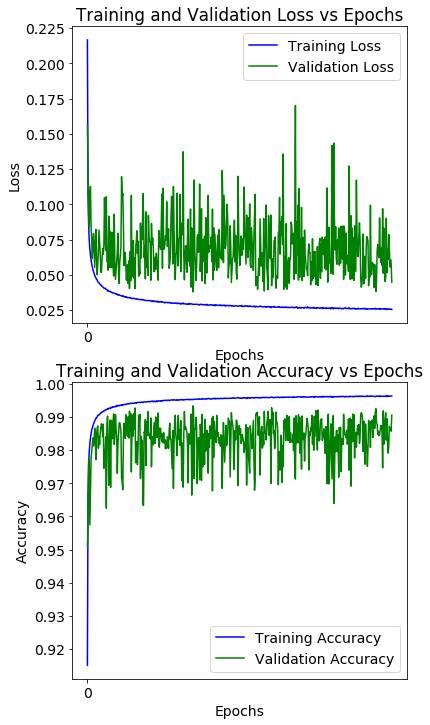

In [194]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.figure(figsize=(6,12))

plt.subplot(2,1,1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::100])
plt.title('Training and Validation Loss vs Epochs')
plt.legend()

plt.subplot(2,1,2)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc, 'blue', label='Training Accuracy')
plt.plot(val_acc, 'green', label='Validation Accuracy')
plt.xticks(range(0,epochs)[0::100])
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.savefig("plots_perf.svg")
plt.show()

In [52]:
model_ecg1.load_weights('./best_weights_ecg_32layer.hdf5')
y_pred = model_ecg.predict(ecg_test)
predict_test=np.argmax(y_pred, axis=1)
predict_test=predict_test.reshape(predict_test.shape[0],1)
cm=confusion_matrix(y_test_num, predict_test)
cm

array([[50196,   172],
       [   54,  1314]], dtype=int64)

In [53]:
(cm[1,1]+cm[0,0])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[0,1])

0.9956316684706974

In [54]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.9605263157894737

In [42]:
cm[0,0]/(cm[0,0]+cm[0,1])

0.9975182655654383